In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import os
from pathlib import Path
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
sns.set(style="whitegrid", context="talk")
import plotly.graph_objects as go
from getpass import getuser
pd.set_option('display.max_columns', None)

In [2]:
def obtener_rutas_usuario(base_local: Path = None, base_remoto: str = None, usar_remoto: bool = False):
    """
    Devuelve las rutas de datos para el usuario actual, usando pathlib.
    Ajusta la ruta si estás ejecutando desde 'notebooks/', considerando la ruta relativa.

    Parámetros:
    - base_local: ruta base local donde se encuentran los datos, considerando la estructura cookiecutter (por defecto: '../data/')
    - base_remoto: ruta base remota tipo GCP, cuando estas en la VM
    - usar_remoto: True para rutas de cloud (base_remoto), False para rutas locales (base_local)

    Retorna:
    - dict con rutas: rawData, externalData, interimData, processedData
    """
    if base_local is None:
        try:
            base_local = Path(__file__).resolve().parent.parent / 'data'
        except NameError:
            base_local = Path.cwd()
            if 'notebooks' in base_local.parts:
                base_local = base_local.parent
            base_local = base_local / 'data'

    if base_remoto is None:
        base_remoto = 'gs://default-bucket/ScoreCI'

    if usar_remoto:
        rutas = {
            'rawData': f'{base_remoto}/raw/',
            'externalData': f'{base_remoto}/external/',
            'interimData': f'{base_remoto}/interim/',
            'processedData': f'{base_remoto}/processed/'
        }
    else:
        rutas = {
            'rawData': base_local / 'raw',
            'externalData': base_local / 'external',
            'interimData': base_local / 'interim',
            'processedData': base_local / 'processed'
        }

    return rutas

In [3]:
rutas = obtener_rutas_usuario()

In [4]:
df = pd.read_parquet(os.path.join(rutas.get('interimData'), 'Sabana_integrada_asesor_ScoreCI_VF.parquet'))

In [5]:
df.shape

(1722, 183)

In [6]:
df.set_index('ASESOR_ID', inplace=True)

In [7]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1722 entries, 1949827 to 92461366
Columns: 182 entries, PORC_CR_T14 to EMPEORA_CATS_T2
dtypes: category(1), float64(126), int32(21), int64(32), int8(1), object(1)
memory usage: 2.2+ MB


None

,PORC_CR_T14,PORC_CR_T9,PORC_CR_T6,PORC_CR_T0,PORC_CR_T17,PORC_CR_T18,PORC_CR_T4,PORC_CR_T7,PORC_CR_T26,PORC_CR_T2,PORC_CR_T21,PORC_CR_T15,PORC_CR_T8,PORC_CR_T20,PORC_CR_T23,PORC_CR_T11,PORC_CR_T3,PORC_CR_T22,PORC_CR_T13,PORC_CR_T5,PORC_CR_T10,PORC_CR_T16,PORC_CR_T19,PORC_CR_T25,PORC_CR_T12,PORC_CR_T24,PORC_CR_T1,y,POSITION_DESC,ANT_ASESOR,C_COBRANZA_T0,C_COBRANZA_T1,C_COBRANZA_T2,HORAS_VUELO,PORCT_RENOV_T2,PORCT_RENOV_T1,PORCT_RENOV_T0,ANT_ASESOR_RANGO,ANT_ASESOR_RANGO_NUM,PCNT_FPD_T2,PCNT_FPD_T1,PCNT_FPD_T0,TOT_AMI_T2,TOT_AMI_T1,TOT_AMI_T0,TOT_MAC_T2,TOT_MAC_T1,TOT_MAC_T0,TOT_SINVC_T2,TOT_SINVC_T1,TOT_SINVC_T0,TOT_VC_T2,TOT_VC_T1,TOT_VC_T0,DESEMBOLSOS_SIN_EXP_T2,DESEMBOLSOS_CON_EXP_T2,DESEMBOLSOS_SIN_EXP_T1,DESEMBOLSOS_CON_EXP_T1,DESEMBOLSOS_SIN_EXP_T0,DESEMBOLSOS_CON_EXP_T0,AVG_CICLOS_EJE_T2,AVG_CICLOS_EJE_T1,AVG_CICLOS_EJE_T0,AVG_CICLOS_CI_T2,AVG_CICLOS_CI_T1,AVG_CICLOS_CI_T0,CLIENTES_EXPERIENCIA_GRUPAL_T2,CLIENTES_EXPERIENCIA_GRUPAL_T1,CLIENTES_EXPERIENCIA_GRUPAL_T0,NUEVOS_PRODUCTO_T2,NUEVOS_PRODUCTO_T1,NUEVOS_PRODUCTO_T0,NUEVOS_PUROS_T2,NUEVOS_PUROS_T1,NUEVOS_PUROS_T0,SEGURO_FAMILIAR_T2,SEGURO_FAMILIAR_T1,SEGURO_FAMILIAR_T0,SEGURO_VOLUNTARIO_T2,SEGURO_VOLUNTARIO_T1,SEGURO_VOLUNTARIO_T0,CTES0_SIN_EXP_T2,CTES0_CON_EXP_T2,CTES1A7_SIN_EXP_T2,CTES1A7_CON_EXP_T2,CTES8A60_SIN_EXP_T2,CTES8A60_CON_EXP_T2,CTES60M_SIN_EXP_T2,CTES60M_CON_EXP_T2,CTES0_SIN_EXP_T1,CTES0_CON_EXP_T1,CTES1A7_SIN_EXP_T1,CTES1A7_CON_EXP_T1,CTES8A60_SIN_EXP_T1,CTES8A60_CON_EXP_T1,CTES60M_SIN_EXP_T1,CTES60M_CON_EXP_T1,CTES0_SIN_EXP_T0,CTES0_CON_EXP_T0,CTES1A7_SIN_EXP_T0,CTES1A7_CON_EXP_T0,CTES8A60_SIN_EXP_T0,CTES8A60_CON_EXP_T0,CTES60M_SIN_EXP_T0,CTES60M_CON_EXP_T0,CR0_SIN_EXP_T2,CR0_CON_EXP_T2,CR1A7_SIN_EXP_T2,CR1A7_CON_EXP_T2,CR8A60_SIN_EXP_T2,CR8A60_CON_EXP_T2,CR60M_SIN_EXP_T2,CR60M_CON_EXP_T2,CR0_SIN_EXP_T1,CR0_CON_EXP_T1,CR1A7_SIN_EXP_T1,CR1A7_CON_EXP_T1,CR8A60_SIN_EXP_T1,CR8A60_CON_EXP_T1,CR60M_SIN_EXP_T1,CR60M_CON_EXP_T1,CR0_SIN_EXP_T0,CR0_CON_EXP_T0,CR1A7_SIN_EXP_T0,CR1A7_CON_EXP_T0,CR8A60_SIN_EXP_T0,CR8A60_CON_EXP_T0,CR60M_SIN_EXP_T0,CR60M_CON_EXP_T0,AVG_ATRASO_ACT_EXP_T2,AVG_ATRASO_ACT_EXP_T1,AVG_ATRASO_ACT_EXP_T0,AVG_ATRASO_ACT_SIN_EXP_T2,AVG_ATRASO_ACT_SIN_EXP_T1,AVG_ATRASO_ACT_SIN_EXP_T0,TIME_BUSINESS_INDEFINIDO,TIME_BUSINESS_DEFAULT,TIME_BUSINESS_2,TIME_BUSINESS_3,TIME_BUSINESS_4,TIME_BUSINESS_5,EDAD_MASCULINO,EDAD_FEMENINO,PORC_FEMENINO,SECTOR_8,SECTOR_22,SECTOR_28,SECTOR_30,MONTO_PRESTADO_PROMEDIO_SE_T2,MONTO_PRESTADO_PROMEDIO_CE_T2,MONTO_PRESTADO_PROMEDIO_SE_T1,MONTO_PRESTADO_PROMEDIO_CE_T1,MONTO_PRESTADO_PROMEDIO_SE_T0,MONTO_PRESTADO_PROMEDIO_CE_T0,PCNT_DESEMBOLSO_TDD,DETERIORO8A60_T2,DETERIORO8A60_T1,DETERIORO8A60_T0,SE_MANTIENE_0_PCT_T0,SE_MANTIENE_ATRASO_PCT_T0,MEJORA_PCT_T0,EMPEORA_T0,SE_MANTIENE_0_PCT_T1,SE_MANTIENE_ATRASO_PCT_T1,MEJORA_PCT_T1,EMPEORA_T1,SE_MANTIENE_0_PCT_T2,SE_MANTIENE_ATRASO_PCT_T2,MEJORA_PCT_T2,EMPEORA_T2,SE_MANTIENE_0_PCT_CATS_T0,SE_MANTIENE_ATRASO_PCT_CATS_T0,MEJORA_PCT_CATS_T0,EMPEORA_CATS_T0,SE_MANTIENE_0_PCT_CATS_T1,SE_MANTIENE_ATRASO_PCT_CATS_T1,MEJORA_PCT_CATS_T1,EMPEORA_CATS_T1,SE_MANTIENE_0_PCT_CATS_T2,SE_MANTIENE_ATRASO_PCT_CATS_T2,MEJORA_PCT_CATS_T2,EMPEORA_CATS_T2
ASESOR_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1949827,0.000000,0.019886,0.048167,0.020897,0.000000,0.000000,0.043097,0.037748,0.000000,0.033791,0.000000,0.000000,0.048462,0.000000,0.00000,0.057905,0.059170,0.00000,0.093738,0.035683,0.037075,0.000000,0.000000,0.000000,0.095078,0.000000,0.018219,0.040606,ASESOR CI,250,8.0,6.0,10.0,247,0.000000,0.000000,0.333333,g.>=37,6,0.142857,0.145455,0.152381,2,2,2,119,113,120,115.0,109.0,116.0,4.0,4.0,4.0,14,5,9,1,11,1,5.563025,5.097345,5.091667,2.159664,2.159292,2.200000,33,28,30,6,3,3,6,3,3,117,105,100,119,107,102,96,17,0,0,6,0,0,0,95,15,0,0,3,0,0,0,100,15,0,0,4,0,1,0,3507819.57,1319247.21,0.00,0.00,168818.32,0.00,0.0,0.0,3623690.23,1217119.44,0.00,0.00,89830.95,0

In [8]:
df.describe()

,PORC_CR_T14,PORC_CR_T9,PORC_CR_T6,PORC_CR_T0,PORC_CR_T17,PORC_CR_T18,PORC_CR_T4,PORC_CR_T7,PORC_CR_T26,PORC_CR_T2,PORC_CR_T21,PORC_CR_T15,PORC_CR_T8,PORC_CR_T20,PORC_CR_T23,PORC_CR_T11,PORC_CR_T3,PORC_CR_T22,PORC_CR_T13,PORC_CR_T5,PORC_CR_T10,PORC_CR_T16,PORC_CR_T19,PORC_CR_T25,PORC_CR_T12,PORC_CR_T24,PORC_CR_T1,y,ANT_ASESOR,C_COBRANZA_T0,C_COBRANZA_T1,C_COBRANZA_T2,HORAS_VUELO,PORCT_RENOV_T2,PORCT_RENOV_T1,PORCT_RENOV_T0,ANT_ASESOR_RANGO_NUM,PCNT_FPD_T2,PCNT_FPD_T1,PCNT_FPD_T0,TOT_AMI_T2,TOT_AMI_T1,TOT_AMI_T0,TOT_MAC_T2,TOT_MAC_T1,TOT_MAC_T0,TOT_SINVC_T2,TOT_SINVC_T1,TOT_SINVC_T0,TOT_VC_T2,TOT_VC_T1,TOT_VC_T0,DESEMBOLSOS_SIN_EXP_T2,DESEMBOLSOS_CON_EXP_T2,DESEMBOLSOS_SIN_EXP_T1,DESEMBOLSOS_CON_EXP_T1,DESEMBOLSOS_SIN_EXP_T0,DESEMBOLSOS_CON_EXP_T0,AVG_CICLOS_EJE_T2,AVG_CICLOS_EJE_T1,AVG_CICLOS_EJE_T0,AVG_CICLOS_CI_T2,AVG_CICLOS_CI_T1,AVG_CICLOS_CI_T0,CLIENTES_EXPERIENCIA_GRUPAL_T2,CLIENTES_EXPERIENCIA_GRUPAL_T1,CLIENTES_EXPERIENCIA_GRUPAL_T0,NUEVOS_PRODUCTO_T2,NUEVOS_PRODUCTO_T1,NUEVOS_PRODUCTO_T0,NUEVOS_PUROS_T2,NUEVOS_PUROS_T1,NUEVOS_PUROS_T0,SEGURO_FAMILIAR_T2,SEGURO_FAMILIAR_T1,SEGURO_FAMILIAR_T0,SEGURO_VOLUNTARIO_T2,SEGURO_VOLUNTARIO_T1,SEGURO_VOLUNTARIO_T0,CTES0_SIN_EXP_T2,CTES0_CON_EXP_T2,CTES1A7_SIN_EXP_T2,CTES1A7_CON_EXP_T2,CTES8A60_SIN_EXP_T2,CTES8A60_CON_EXP_T2,CTES60M_SIN_EXP_T2,CTES60M_CON_EXP_T2,CTES0_SIN_EXP_T1,CTES0_CON_EXP_T1,CTES1A7_SIN_EXP_T1,CTES1A7_CON_EXP_T1,CTES8A60_SIN_EXP_T1,CTES8A60_CON_EXP_T1,CTES60M_SIN_EXP_T1,CTES60M_CON_EXP_T1,CTES0_SIN_EXP_T0,CTES0_CON_EXP_T0,CTES1A7_SIN_EXP_T0,CTES1A7_CON_EXP_T0,CTES8A60_SIN_EXP_T0,CTES8A60_CON_EXP_T0,CTES60M_SIN_EXP_T0,CTES60M_CON_EXP_T0,CR0_SIN_EXP_T2,CR0_CON_EXP_T2,CR1A7_SIN_EXP_T2,CR1A7_CON_EXP_T2,CR8A60_SIN_EXP_T2,CR8A60_CON_EXP_T2,CR60M_SIN_EXP_T2,CR60M_CON_EXP_T2,CR0_SIN_EXP_T1,CR0_CON_EXP_T1,CR1A7_SIN_EXP_T1,CR1A7_CON_EXP_T1,CR8A60_SIN_EXP_T1,CR8A60_CON_EXP_T1,CR60M_SIN_EXP_T1,CR60M_CON_EXP_T1,CR0_SIN_EXP_T0,CR0_CON_EXP_T0,CR1A7_SIN_EXP_T0,CR1A7_CON_EXP_T0,CR8A60_SIN_EXP_T0,CR8A60_CON_EXP_T0,CR60M_SIN_EXP_T0,CR60M_CON_EXP_T0,AVG_ATRASO_ACT_EXP_T2,AVG_ATRASO_ACT_EXP_T1,AVG_ATRASO_ACT_EXP_T0,AVG_ATRASO_ACT_SIN_EXP_T2,AVG_ATRASO_ACT_SIN_EXP_T1,AVG_ATRASO_ACT_SIN_EXP_T0,TIME_BUSINESS_INDEFINIDO,TIME_BUSINESS_DEFAULT,TIME_BUSINESS_2,TIME_BUSINESS_3,TIME_BUSINESS_4,TIME_BUSINESS_5,EDAD_MASCULINO,EDAD_FEMENINO,PORC_FEMENINO,SECTOR_8,SECTOR_22,SECTOR_28,SECTOR_30,MONTO_PRESTADO_PROMEDIO_SE_T2,MONTO_PRESTADO_PROMEDIO_CE_T2,MONTO_PRESTADO_PROMEDIO_SE_T1,MONTO_PRESTADO_PROMEDIO_CE_T1,MONTO_PRESTADO_PROMEDIO_SE_T0,MONTO_PRESTADO_PROMEDIO_CE_T0,PCNT_DESEMBOLSO_TDD,DETERIORO8A60_T2,DETERIORO8A60_T1,DETERIORO8A60_T0,SE_MANTIENE_0_PCT_T0,SE_MANTIENE_ATRASO_PCT_T0,MEJORA_PCT_T0,EMPEORA_T0,SE_MANTIENE_0_PCT_T1,SE_MANTIENE_ATRASO_PCT_T1,MEJORA_PCT_T1,EMPEORA_T1,SE_MANTIENE_0_PCT_T2,SE_MANTIENE_ATRASO_PCT_T2,MEJORA_PCT_T2,EMPEORA_T2,SE_MANTIENE_0_PCT_CATS_T0,SE_MANTIENE_ATRASO_PCT_CATS_T0,MEJORA_PCT_CATS_T0,EMPEORA_CATS_T0,SE_MANTIENE_0_PCT_CATS_T1,SE_MANTIENE_ATRASO_PCT_CATS_T1,MEJORA_PCT_CATS_T1,EMPEORA_CATS_T1,SE_MANTIENE_0_PCT_CATS_T2,SE_MANTIENE_ATRASO_PCT_CATS_T2,MEJORA_PCT_CATS_T2,EMPEORA_CATS_T2
count,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1708.000000,1718.000000,1722.000000,1644.000000,1669.000000,1685.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.00000,1722.000000,1722.00

In [9]:
df.POSITION_DESC.value_counts()

POSITION_DESC
ASESOR CI    1722
Name: count, dtype: int64

In [10]:
# Eliminar position_desc y ANT_ASESOR_RANGO
df.drop(columns=['POSITION_DESC','ANT_ASESOR_RANGO'], inplace=True)

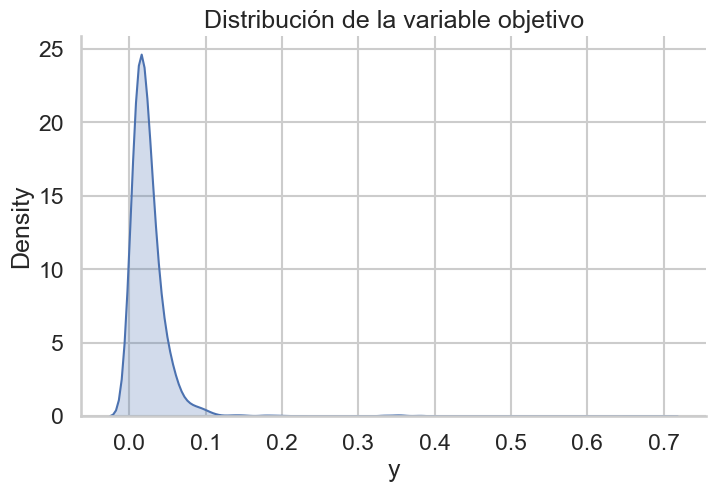

In [11]:
sns.displot(data=df, x='y', kind='kde', fill=True, palette='Set2', aspect=1.5)
plt.title('Distribución de la variable objetivo')
plt.show()

## Missing Values

In [12]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Valores nulos por columna:")
display(missing_values)

Valores nulos por columna:


TOT_SINVC_T2                      14
TOT_SINVC_T1                       4
TOT_VC_T2                         78
TOT_VC_T1                         53
TOT_VC_T0                         37
SE_MANTIENE_0_PCT_T1               4
SE_MANTIENE_ATRASO_PCT_T1          4
MEJORA_PCT_T1                      4
EMPEORA_T1                         4
SE_MANTIENE_0_PCT_T2              33
SE_MANTIENE_ATRASO_PCT_T2         33
MEJORA_PCT_T2                     33
EMPEORA_T2                        33
SE_MANTIENE_0_PCT_CATS_T1          4
SE_MANTIENE_ATRASO_PCT_CATS_T1     4
MEJORA_PCT_CATS_T1                 4
EMPEORA_CATS_T1                    4
SE_MANTIENE_0_PCT_CATS_T2         33
SE_MANTIENE_ATRASO_PCT_CATS_T2    33
MEJORA_PCT_CATS_T2                33
EMPEORA_CATS_T2                   33
dtype: int64

In [13]:
lsImputar = list(missing_values.index)

**_Imputador_**

In [14]:
imputador = Pipeline([
    ('imputacion', SimpleImputer(strategy='mean'))
])

In [15]:
preprocesador = ColumnTransformer([
    ('num', imputador, lsImputar)
], remainder='passthrough')

# nos permite que el objeto preprocesador, retorne un DataFrame
preprocesador.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputacion',
                                                  SimpleImputer())]),
                                 ['TOT_SINVC_T2', 'TOT_SINVC_T1', 'TOT_VC_T2',
                                  'TOT_VC_T1', 'TOT_VC_T0',
                                  'SE_MANTIENE_0_PCT_T1',
                                  'SE_MANTIENE_ATRASO_PCT_T1', 'MEJORA_PCT_T1',
                                  'EMPEORA_T1', 'SE_MANTIENE_0_PCT_T2',
                                  'SE_MANTIENE_ATRASO_PCT_T2', 'MEJORA_PCT_T2',
                                  'EMPEORA_T2', 'SE_MANTIENE_0_PCT_CATS_T1',
                                  'SE_MANTIENE_ATRASO_PCT_CATS_T1',
                                  'MEJORA_PCT_CATS_T1', 'EMPEORA_CATS_T1',
                                  'SE_MANTIENE_0_PCT_CATS_T2',
                                  'SE_MANTIENE_ATRASO_PCT_CATS_T2',
                                  'MEJORA_PCT_CATS_T2', 'EMPEORA_CATS_T2'])])

In [16]:
df_transformado = preprocesador.fit_transform(df)

In [17]:
df_transformado.head()

,num__TOT_SINVC_T2,num__TOT_SINVC_T1,num__TOT_VC_T2,num__TOT_VC_T1,num__TOT_VC_T0,num__SE_MANTIENE_0_PCT_T1,num__SE_MANTIENE_ATRASO_PCT_T1,num__MEJORA_PCT_T1,num__EMPEORA_T1,num__SE_MANTIENE_0_PCT_T2,num__SE_MANTIENE_ATRASO_PCT_T2,num__MEJORA_PCT_T2,num__EMPEORA_T2,num__SE_MANTIENE_0_PCT_CATS_T1,num__SE_MANTIENE_ATRASO_PCT_CATS_T1,num__MEJORA_PCT_CATS_T1,num__EMPEORA_CATS_T1,num__SE_MANTIENE_0_PCT_CATS_T2,num__SE_MANTIENE_ATRASO_PCT_CATS_T2,num__MEJORA_PCT_CATS_T2,num__EMPEORA_CATS_T2,remainder__PORC_CR_T14,remainder__PORC_CR_T9,remainder__PORC_CR_T6,remainder__PORC_CR_T0,remainder__PORC_CR_T17,remainder__PORC_CR_T18,remainder__PORC_CR_T4,remainder__PORC_CR_T7,remainder__PORC_CR_T26,remainder__PORC_CR_T2,remainder__PORC_CR_T21,remainder__PORC_CR_T15,remainder__PORC_CR_T8,remainder__PORC_CR_T20,remainder__PORC_CR_T23,remainder__PORC_CR_T11,remainder__PORC_CR_T3,remainder__PORC_CR_T22,remainder__PORC_CR_T13,remainder__PORC_CR_T5,remainder__PORC_CR_T10,remainder__PORC_CR_T16,remainder__PORC_CR_T19,remainder__PORC_CR_T25,remainder__PORC_CR_T12,remainder__PORC_CR_T24,remainder__PORC_CR_T1,remainder__y,remainder__ANT_ASESOR,remainder__C_COBRANZA_T0,remainder__C_COBRANZA_T1,remainder__C_COBRANZA_T2,remainder__HORAS_VUELO,remainder__PORCT_RENOV_T2,remainder__PORCT_RENOV_T1,remainder__PORCT_RENOV_T0,remainder__ANT_ASESOR_RANGO_NUM,remainder__PCNT_FPD_T2,remainder__PCNT_FPD_T1,remainder__PCNT_FPD_T0,remainder__TOT_AMI_T2,remainder__TOT_AMI_T1,remainder__TOT_AMI_T0,remainder__TOT_MAC_T2,remainder__TOT_MAC_T1,remainder__TOT_MAC_T0,remainder__TOT_SINVC_T0,remainder__DESEMBOLSOS_SIN_EXP_T2,remainder__DESEMBOLSOS_CON_EXP_T2,remainder__DESEMBOLSOS_SIN_EXP_T1,remainder__DESEMBOLSOS_CON_EXP_T1,remainder__DESEMBOLSOS_SIN_EXP_T0,remainder__DESEMBOLSOS_CON_EXP_T0,remainder__AVG_CICLOS_EJE_T2,remainder__AVG_CICLOS_EJE_T1,remainder__AVG_CICLOS_EJE_T0,remainder__AVG_CICLOS_CI_T2,remainder__AVG_CICLOS_CI_T1,remainder__AVG_CICLOS_CI_T0,remainder__CLIENTES_EXPERIENCIA_GRUPAL_T2,remainder__CLIENTES_EXPERIENCIA_GRUPAL_T1,remainder__CLIENTES_EXPERIENCIA_GRUPAL_T0,remainder__NUEVOS_PRODUCTO_T2,remainder__NUEVOS_PRODUCTO_T1,remainder__NUEVOS_PRODUCTO_T0,remainder__NUEVOS_PUROS_T2,remainder__NUEVOS_PUROS_T1,remainder__NUEVOS_PUROS_T0,remainder__SEGURO_FAMILIAR_T2,remainder__SEGURO_FAMILIAR_T1,remainder__SEGURO_FAMILIAR_T0,remainder__SEGURO_VOLUNTARIO_T2,remainder__SEGURO_VOLUNTARIO_T1,remainder__SEGURO_VOLUNTARIO_T0,remainder__CTES0_SIN_EXP_T2,remainder__CTES0_CON_EXP_T2,remainder__CTES1A7_SIN_EXP_T2,remainder__CTES1A7_CON_EXP_T2,remainder__CTES8A60_SIN_EXP_T2,remainder__CTES8A60_CON_EXP_T2,remainder__CTES60M_SIN_EXP_T2,remainder__CTES60M_CON_EXP_T2,remainder__CTES0_SIN_EXP_T1,remainder__CTES0_CON_EXP_T1,remainder__CTES1A7_SIN_EXP_T1,remainder__CTES1A7_CON_EXP_T1,remainder__CTES8A60_SIN_EXP_T1,remainder__CTES8A60_CON_EXP_T1,remainder__CTES60M_SIN_EXP_T1,remainder__CTES60M_CON_EXP_T1,remainder__CTES0_SIN_EXP_T0,remainder__CTES0_CON_EXP_T0,remainder__CTES1A7_SIN_EXP_T0,remainder__CTES1A7_CON_EXP_T0,remainder__CTES8A60_SIN_EXP_T0,remainder__CTES8A60_CON_EXP_T0,remainder__CTES60M_SIN_EXP_T0,remainder__CTES60M_CON_EXP_T0,remainder__CR0_SIN_EXP_T2,remainder__CR0_CON_EXP_T2,remainder__CR1A7_SIN_EXP_T2,remainder__CR1A7_CON_EXP_T2,remainder__CR8A60_SIN_EXP_T2,remainder__CR8A60_CON_EXP_T2,remainder__CR60M_SIN_EXP_T2,remainder__CR60M_CON_EXP_T2,remainder__CR0_SIN_EXP_T1,remainder__CR0_CON_EXP_T1,remainder__CR1A7_SIN_EXP_T1,remainder__CR1A7_CON_EXP_T1,remainder__CR8A60_SIN_EXP_T1,remainder__CR8A60_CON_EXP_T1,remainder__CR60M_SIN_EXP_T1,remainder__CR60M_CON_EXP_T1,remainder__CR0_SIN_EXP_T0,remainder__CR0_CON_EXP_T0,remainder__CR1A7_SIN_EXP_T0,remainder__CR1A7_CON_EXP_T0,remainder__CR8A60_SIN_EXP_T0,remainder__CR8A60_CON_EXP_T0,remainder__CR60M_SIN_EXP_T0,remainder__CR60M_CON_EXP_T0,remainder__AVG_ATRASO_ACT_EXP_T2,remainder__AVG_ATRASO_ACT_EXP_T1,remainder__AVG_ATRASO_ACT_EXP_T0,remainder__AVG_ATRASO_ACT_SIN_EXP_T2,remainder__AVG_ATRASO_ACT_SIN_EXP_T1,remainder__AVG_ATRAS

In [18]:
df_transformado.shape

(1722, 180)

In [ ]:
columnas_finales = lsImputar + [col for col in df.columns if col not in lsImputar]

In [ ]:
df_transformado = pd.DataFrame(df_transformado, columns=columnas_finales)

In [ ]:
df_transformado.head()

In [ ]:
missing_values = df_transformado.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Valores nulos por columna:")
display(missing_values)

**_Correlación_**

In [ ]:
def analiza_correlacion(df, umbral=0.9):
    """
    Analiza y visualiza las correlaciones entre variables numericas
    Parametros:
    df: DataFrame con los datos
    umbral: valor absoluto de correlacion a partir del cual se condierara alta
    """
    # selecciona solo variables numericas
    df_num = df.select_dtypes(include=[np.number])
    #calcula matriz de correlaciones
    corr_matrix = df_num.corr(method='pearson')

    return corr_matrix

# uso de la funcion:
corr_matrix = analiza_correlacion(df_transformado, umbral=0.9)